In [ ]:
from google.colab import drive
import os
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
negpath = "/content/drive/MyDrive/neg"
pospath = "/content/drive/MyDrive/pos"
dir_list = os.listdir(pospath)

In [ ]:
def GetDataDict(path):
  dataDict = {}
  for fi in os.listdir(path):
    with open(path + "/"+fi) as f:
      data = f.read()
      dataDict[fi] = data
  return dataDict

In [ ]:
posDataDict = GetDataDict(pospath)

In [ ]:
negDataDict = GetDataDict(negpath)

In [ ]:
posDataframe = pd.DataFrame.from_dict(posDataDict, orient='index')

In [ ]:
negDataframe = pd.DataFrame.from_dict(negDataDict, orient='index')

In [ ]:
posDataframe.to_csv('posDataframe.csv')
files.download("posDataframe.csv")
negDataframe.to_csv('negDataframe.csv')
files.download("negDataframe.csv")

NameError: ignored

In [6]:
import pandas as pd
from google.colab import files

In [7]:
posDataframe = pd.read_csv("/content/posDataframe.csv")
negDataframe = pd.read_csv("/content/negDataframe.csv")

posDataframe = posDataframe.head(5000)
negDataframe = negDataframe.head(5000)
posDataframe['label'] = "Positive"
negDataframe['label'] = "Negative"
frames = [posDataframe, negDataframe]
df = pd.concat(frames)
df = df
df['label'] = df['label'].astype("category")
df.columns = ["file", "text", "label"]

df['text'] = [entry.lower() for entry in df['text']]
df.head()

<ipython-input-7-10d3241ae8e4>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  posDataframe['label'] = "Positive"


,file,text,label
0,11495_10.txt,we saw this at one of the local art movie thea...,Positive
1,11708_8.txt,the reason why people say that this movie scar...,Positive
2,12004_10.txt,this film is a true and historical film. it is...,Positive
3,11410_7.txt,edmund lowe (who reminds me somewhat of warren...,Positive
4,11714_10.txt,"then you must see this film, to understand the...",Positive


In [8]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
)
from sklearn.model_selection import train_test_split

import numpy as np
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import csr_matrix
from pandas.api.types import is_numeric_dtype
from nltk.corpus import stopwords







In [12]:
def CreateXLabs(df, labelColumnStr, textColStr):
  vectorizer = TfidfVectorizer(stop_words='english')
  textArr = vectorizer.fit_transform(df[textColStr].tolist())
  bow = np.array(textArr.todense())

  colnames = vectorizer.get_feature_names_out()

  revDf = pd.DataFrame(textArr.toarray(), columns=colnames)

  x = csr_matrix(revDf.values)
  labels = df[labelColumnStr]
  cols = vectorizer.get_feature_names_out()

  return x, labels, vectorizer

In [13]:
from matplotlib.pyplot import title

def NaiveBayesMBTFID(df, labelCol, textCol):

  x, labels, vectorizer = CreateXLabs(df, labelCol, textCol)

  X_train, X_test, y_train, y_test = train_test_split(x, labels,
                                                      test_size=0.3)
  modelSent = MultinomialNB().fit(X_train, y_train)
  y_pred = modelSent.predict(X_test)
  cmlables = ["Positive", "Negative"]
  cm = confusion_matrix(y_test, y_pred)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=cmlables)

  disp.plot()
  disp.ax_.set_title( "Accuracy " + str(accuracy_score(y_test, y_pred)) + " " + labelCol)

  print(classification_report(y_test, y_pred))


  return accuracy_score(y_test, y_pred)

              precision    recall  f1-score   support

    Negative       0.88      0.90      0.89      1483
    Positive       0.90      0.88      0.89      1517

    accuracy                           0.89      3000
   macro avg       0.89      0.89      0.89      3000
weighted avg       0.89      0.89      0.89      3000



0.8886666666666667

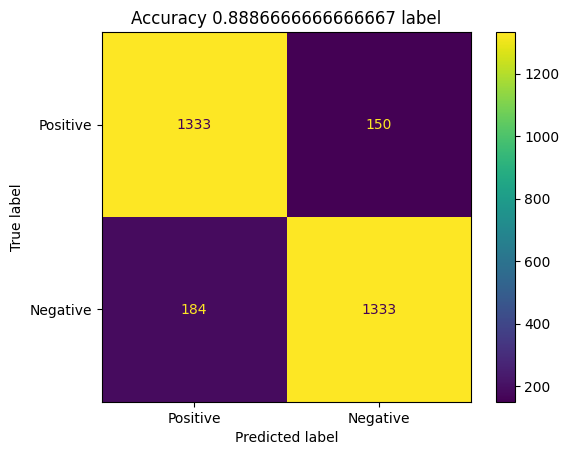

In [14]:
NaiveBayesMBTFID(df, 'label', 'text')

In [16]:
import nltk
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [20]:
dfpos = pd.read_csv("/content/posDataframe.csv")
dfneg = pd.read_csv("/content/negDataframe.csv")
dfpos = posDataframe.head(5000)
dfneg = negDataframe.head(5000)
dfpos.columns = ["file", "text", "label"]
dfneg.columns = ["file", "text", "label"]

posfiles = dfpos['file']
negfiles = dfneg['file']

index = pd.Index(range(0, len(dfpos), 1))
index = pd.Index(range(0, len(dfneg), 1))

dfpos.set_index(index)
dfneg.set_index(index)

dfpos['label'] = 1
dfneg['label'] = 0
frames = [dfneg, dfpos]
df = pd.concat(frames)
df.head()


,file,text,label
0,11745_1.txt,The fact that I did not like the music is a ve...,0
1,12201_3.txt,The summary pretty much sums it all up. This i...,0
2,11938_3.txt,The movie began well enough. It had a fellow g...,0
3,11559_4.txt,THE NIGHT EVELYN CAME OUT OF THE GRAVE (Emilio...,0
4,11098_1.txt,Like most people I was intrigued when I heard ...,0


In [21]:
df["label"].value_counts()
import re

In [22]:
positiveFD = nltk.FreqDist(word for text in df[df["label"] == 1]["text"] for word in text.lower().split())
negativeFD = nltk.FreqDist(word  for text in df[df["label"] == 0]["text"] for word in text.lower().split())

In [23]:
import matplotlib.pyplot as plt

In [24]:
import re
cleanedData = []

lemma = WordNetLemmatizer()
swords = stopwords.words("english")
for text in df["text"]:

    # Cleaning links
    text = re.sub(r'http\S+', '', text)

    # Cleaning everything except alphabetical and numerical characters
    text = re.sub("[^a-zA-Z0-9]"," ",text)

    # Tokenizing and lemmatizing
    text = nltk.word_tokenize(text.lower())
    text = [lemma.lemmatize(word) for word in text]

    # Removing stopwords
    text = [word for word in text if word not in swords]

    # Joining
    text = "".join(text)

    cleanedData.append(text)

In [ ]:
cleanedData

In [30]:
vectorizer = CountVectorizer(max_features=10000)
BOW = vectorizer.fit_transform(cleanedData)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(BOW,np.asarray(df["label"]))

In [35]:
from sklearn.svm import SVC
import time
start_time = time.time()

model = SVC()
model.fit(x_train,y_train)

end_time = time.time()
process_time = round(end_time-start_time,2)
print("Fitting SVC took {} seconds".format(process_time))

preds = model.predict(x_test)
from sklearn.metrics import accuracy_score,confusion_matrix

print("Accuracy of model is {}%".format(accuracy_score(y_test,preds) * 100))

Fitting SVC took 2.58 seconds
Accuracy of model is 50.080000000000005%


Accuracy of model is 49.88%


In [ ]:
dfpos = pd.read_csv("/content/drive/MyDrive/posDataframe.csv")
dfneg = pd.read_csv("/content/drive/MyDrive/negDataframe.csv")

dfpos.columns = ["file", "text"]
dfneg.columns = ["file", "text"]

posfiles = dfpos['file']
negfiles = dfneg['file']

index = pd.Index(range(0, len(dfpos), 1))
index = pd.Index(range(0, len(dfneg), 1))

dfpos.set_index(index)
dfneg.set_index(index)

dfpos['label'] = 1
dfneg['label'] = 0
frames = [dfneg, dfpos]
df = pd.concat(frames)
df.head()



In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
)
from sklearn.model_selection import train_test_split

import numpy as np
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import csr_matrix
from pandas.api.types import is_numeric_dtype
from nltk.corpus import stopwords

def CreateXLabs(df, labelColumnStr, textColStr):
  vectorizer = TfidfVectorizer()
  textArr = vectorizer.fit_transform(df[textColStr].tolist())
  bow = np.array(textArr.todense())

  colnames = vectorizer.get_feature_names_out()

  revDf = pd.DataFrame(textArr.toarray(), columns=colnames)

  x = csr_matrix(revDf.values)
  labels = df[labelColumnStr]
  return x, labels, vectorizer

from matplotlib.pyplot import title
def NaiveBayesMBTFID(df, labelCol, textCol):

  x, labels, vectorizer = CreateXLabs(df, labelCol, textCol)

  X_train, X_test, y_train, y_test = train_test_split(x, labels,
                                                      test_size=0.3)
  modelSent = MultinomialNB().fit(X_train, y_train)
  y_pred = modelSent.predict(X_test)
  cmlables = ["Positive", "Negative"]
  cm = confusion_matrix(y_test, y_pred)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=cmlables)

  disp.plot()
  disp.ax_.set_title( "Accuracy " + str(accuracy_score(y_test, y_pred)) + " " + labelCol)

  print(classification_report(y_test, y_pred))

  return accuracy_score(y_test, y_pred)

NaiveBayesMBTFID(df, 'label', 'text')